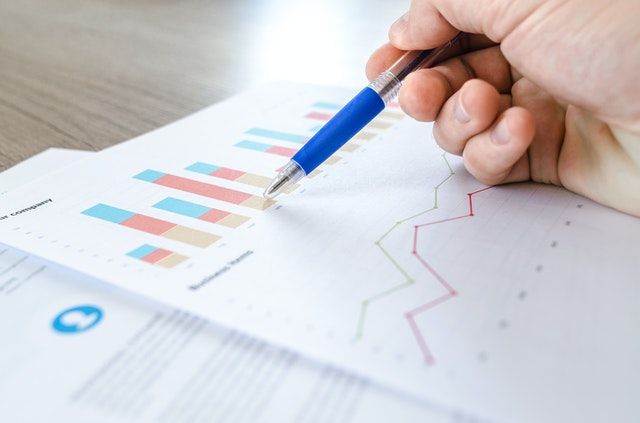

Photo by Lukas from Pexels

# Data Analysis of Data Science Survey Conducted by Kaggle at 2017

Analysing Data collected by Kaggle survey on Machine Learning and Data Science to find some insight especial related to Python, R and Jupyter.

Will be using pandas, matlibplot and seaborn library for this data analysis.



In [ ]:
import pandas as pd

In [ ]:
# Change this
data_dir = '../input/kaggle-survey-2017'

In [ ]:
import os

os.listdir(data_dir)

In [ ]:
survey_raw = pd.read_csv(data_dir + "/multipleChoiceResponses.csv" , encoding='ISO-8859-1', low_memory=False)

freeform = pd.read_csv(data_dir + "/freeformResponses.csv" , encoding='ISO-8859-1', low_memory=False)

conversion=pd.read_csv(data_dir + "/conversionRates.csv" , encoding='ISO-8859-1', low_memory=False)


In [ ]:
pd.set_option('display.max_columns', None)
survey_raw

In [ ]:
freeform

In [ ]:
conversion

In [ ]:
genders_raw=survey_raw['GenderSelect'].dropna()

Genders=pd.unique(genders_raw)

print (Genders)

In [ ]:
employment=pd.unique(survey_raw['EmploymentStatus'].dropna())

print (employment)

*Masking 'Employed full-time','Independent contractor, freelancer, or self-employed' and 'Employed part-time' as Employed.*



*Masking 'Not employed, but looking for work','Not employed, and not looking for work' and 'I prefer not to say' as Unemployed.*

In [ ]:
survey_raw['EmploymentStatus']=survey_raw['EmploymentStatus'].replace(['Employed full-time',
                                                                        'Independent contractor, freelancer, or self-employed',
                                                                        'Employed part-time'], 'Employee')


survey_raw['EmploymentStatus']=survey_raw['EmploymentStatus'].replace(['Not employed, but looking for work',
                                                                        'Not employed, and not looking for work',
                                                                        'I prefer not to say'], 'Unemployed')

In [ ]:
employment=pd.unique(survey_raw['EmploymentStatus'].dropna())

print (employment)

In [ ]:

python_use=pd.unique(survey_raw['WorkToolsFrequencyPython'].dropna())

print (python_use)

In [ ]:
education=pd.unique(survey_raw['FormalEducation'].dropna())

print (education)

*Masking "Some college/university study without earning a bachelor's degree" as "No Bachelor's Degree" and"I did not complete any formal education past high school" as "Only High School"*

In [ ]:
survey_raw['FormalEducation']=survey_raw['FormalEducation'].replace(["Some college/university study without earning a bachelor's degree"],"No Bachelor's Degree")

survey_raw['FormalEducation']=survey_raw['FormalEducation'].replace(["I did not complete any formal education past high school"],"Only High School")

In [ ]:
education=pd.unique(survey_raw['FormalEducation'].dropna())

print (education)

**Masking "Some college/university study without earning a bachelor's degree" as "No Bachelor's Degree"**


**and  "I did not complete any formal education past high school" as "Only High School"**

In [ ]:
survey_raw['FormalEducation']=survey_raw['FormalEducation'].replace(["Some college/university study without earning a bachelor's degree"],"No Bachelor's Degree")

survey_raw['FormalEducation']=survey_raw['FormalEducation'].replace(["I did not complete any formal education past high school"],"Only High School")

In [ ]:
education=pd.unique(survey_raw['FormalEducation'].dropna())

print (education)

In [ ]:
data_science=pd.unique(survey_raw['DataScienceIdentitySelect'].dropna())

print (data_science)

# Exploratory Analysis and Visualization# 


Here we are going to visualize some columns to explore farther analysis.

Let's begin by importing matplotlib.pyplot and seaborn.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('dark')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (20, 6)
#matplotlib.rcParams['figure.facecolor'] = 'lightpink'

***Here we are going to see Gender diversity of the survey***

In [ ]:

fig1,ax1=plt.subplots(figsize =(20,7))

fig1=plt.suptitle("Gender Diversity")

ax1=sns.countplot(y=survey_raw['GenderSelect']);

ax1.set_ylabel("")

for rect in ax1.patches:
    ax1.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, rect.get_width(), weight='bold' )
    
plt.tight_layout()

In [ ]:
survey_gender=[survey_raw[survey_raw['GenderSelect']=='Non-binary, genderqueer, or gender non-conforming']['GenderSelect'].count(),
                survey_raw[survey_raw['GenderSelect']=='A different identity']['GenderSelect'].count(),
                survey_raw[survey_raw['GenderSelect']=='Female']['GenderSelect'].count(),
                survey_raw[survey_raw['GenderSelect']=='Male']['GenderSelect'].count()]

genders=['GNC','ADI', 'Female', 'Male']


explode =(0,0.3,0.2,0)

fig2,ax2= plt.subplots(figsize = (15,8))

plt.pie(survey_gender, explode=explode, labels=genders, autopct='%1.2f%%')

ax2.legend(genders, loc = 'upper right')

plt.tight_layout()

* In This Survey, Male gender is in majority.

***Exploring respondent resident country***

In [ ]:
fig3,ax3=plt.subplots(figsize =(15,15))
ax3=sns.countplot(y=survey_raw['Country']);
for rect in ax3.patches:
    ax3.text (rect.get_width(), rect.get_y() + rect.get_height()/1.2, rect.get_width(), weight='bold' )

ax3.set_ylabel("Countries")
    
plt.tight_layout()

* Large number of Survey Respondent are from U.S.A and India

***Exploring Machine Learning tool utilized next year***

In [ ]:
fig4,ax4=plt.subplots(figsize =(15,13))
ax4=sns.countplot(y=survey_raw['MLToolNextYearSelect']);
ax4.set_ylabel('Machine Learning Tools', labelpad= 23)
for rect in ax4.patches:
    ax4.text (rect.get_width(), rect.get_y() + rect.get_height()/1.2, rect.get_width(), weight='bold' )
plt.tight_layout()

* Tensorflow is the top Machine Learning tool which these survey respondent will opt for next year, followed by python.

***Exploring Language recommendation from respondent***

In [ ]:
fig5,ax5=plt.subplots(figsize =(15,10))
ax5=sns.countplot(x=survey_raw['LanguageRecommendationSelect']);
ax5.set_xlabel('Language Recommendation', labelpad= 23)
for rect in ax5.patches:
    ax5.text(rect.get_x() + rect.get_width()/4,rect.get_height(),rect.get_height(), weight='bold' )
    
plt.tight_layout()

**Exploring Age groups of respondent**

In [ ]:
sns.kdeplot(survey_raw['Age']);

* Survey respondent are mostly in 20-40 Year old age group.

**Formal Education of respondent**

In [ ]:
fig6,ax6=plt.subplots(figsize =(20,10))

ax6=sns.countplot(x=survey_raw['FormalEducation']);

ax6.set_xlabel('Formal Education')


for rect in ax6.patches:
    ax6.text (rect.get_x() + rect.get_width()/2.5,rect.get_height(),rect.get_height(), weight='bold' )

plt.tight_layout();

* Majority of Survey Respondent have "Master's Degree" and "Bachelor's Degree" as formal education.

***Number of respondent identify in Data Science***

In [ ]:
answers=['Yes', 'No', 'Sort of (Explain more)']

datascience=[survey_raw[survey_raw['DataScienceIdentitySelect']=='Yes']['DataScienceIdentitySelect'].count(),
             survey_raw[survey_raw['DataScienceIdentitySelect']=='No']['DataScienceIdentitySelect'].count(),
             survey_raw[survey_raw['DataScienceIdentitySelect']=='Sort of (Explain more)']['DataScienceIdentitySelect'].count()]

fig7,ax7= plt.subplots(figsize = (10,8))

#fig7.sup_title("")

ax7.pie(datascience, labels=answers, autopct='%1.2f%%');

ax7.legend(answers, loc = 'upper left');

plt.tight_layout()

* It seem's slightly more people don't identify as Data Science

# Asking and Answering Questions
Going to see how survey respondent answered Data Science related questions depending on their student status .

### Q1: How gender diverse is data science in this survey?
How many gender type answered the survey?

In [ ]:
print("Different Gender types who answered the survey:")
i=1
for gender in Genders:
    print("{}.".format(i),gender)
    i=i+1

In [ ]:
plt.rcParams["axes.labelsize"] = 15

fig9, ax12 = plt.subplots(figsize = (20,5))

#fig9.suptitle('Responses to "Data Science"')
g6 = sns.countplot(x='DataScienceIdentitySelect',
                   hue='GenderSelect'
                  ,data=survey_raw, order=['Yes', 'No', 'Sort of (Explain more)']);

sns.set(font_scale=1)
for rect in ax12.patches:
    ax12.text (rect.get_x() + rect.get_width()/4.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
    
g6.set_xlabel('\n Responses to Data Science Select', labelpad=7)

plt.tight_layout()

* Most of the gender type doesn't identify in Data Science.

### Q2: Students moods regarding Data Science and importance of platform where they learnt from?

Number of Students in this survey

In [ ]:
stud=sns.countplot(y='StudentStatus', data=survey_raw)

stud.set_ylabel("Are you Student")

for rect in stud.patches:
    stud.text (rect.get_width(), rect.get_y() + rect.get_height()/2, rect.get_width(), weight='bold' )
    
plt.tight_layout()

* Number of respondent in this survey whose status as Students is 981.

### How many Student respondent selected Data Science?

In [ ]:
Student_DataScience=survey_raw[survey_raw['StudentStatus']=='Yes']

studata=sns.countplot(y='DataScienceIdentitySelect', data=Student_DataScience)

studata.set_ylabel("Students Identify in Data Science Domain")

for rect in studata.patches:
    studata.text (rect.get_width(), rect.get_y() + rect.get_height()/2, rect.get_width(), weight='bold' )
    
plt.tight_layout()

* Numbers of Students selected Data Science are 246 and majority of them are not in data science domain i.e. 542 not selected.

### How usefull was Youtube Platform for students learning data science?

In [ ]:
Student_DataScience_youtube=survey_raw[(survey_raw['StudentStatus']=='Yes') & (survey_raw['DataScienceIdentitySelect']=='Yes')]


stuyt=sns.countplot(y='LearningPlatformUsefulnessYouTube',
                    data=Student_DataScience_youtube)

stuyt.set_ylabel("Youtube Platform Useful")

for rect in stuyt.patches:
    stuyt.text (rect.get_width(), rect.get_y() + rect.get_height()/2, rect.get_width(), weight='bold' )
    
plt.tight_layout()

* It is found in the survey students who are data sciencefound YouTube platform learning usefull meaning 50% somewhat and 50% very useful.

### How many years it took to learn Data Science?

In [ ]:
Student_DataScience_learning=survey_raw[survey_raw['StudentStatus']=='Yes']


dl=sns.countplot(y='LearningDataScienceTime',
                    data=Student_DataScience_learning)

dl.set_ylabel("Time spend Learning Data Science")

for rect in dl.patches:
    dl.text (rect.get_width(), rect.get_y() + rect.get_height()/2, rect.get_width(), weight='bold' )

* Most of the Students spend less than 1 year learning data science.

### Responses from Students rearding usefulness of Courses, Projects, and Documentation

In [ ]:
matplotlib.rcParams['figure.facecolor'] = 'lightpink'

Student_DataScience_learning=survey_raw[survey_raw['StudentStatus']=='Yes']

fig10, (dl1, dl2,dl3) = plt.subplots(ncols=3, sharey=True)
#figsize =(10,5)
fig10.suptitle('Responses from Students rearding usefulness of Courses, Projects, and Documentation')

g1 = sns.countplot(x='LearningPlatformUsefulnessCourses',
                  data=Student_DataScience_learning, ax=dl1, palette="Blues");

#dl1.set_facecolor('grey')
dl1.set_title('Courses')


g2 = sns.countplot(x='LearningPlatformUsefulnessProjects',
                  data=Student_DataScience_learning, ax=dl2, palette="rocket");

dl2.set_title('Projects')


g3 = sns.countplot(x='LearningPlatformUsefulnessDocumentation',
                  data=Student_DataScience_learning, ax=dl3, palette="mako");

#dl3.set_facecolor('paleturquoise')
dl3.set_title('Documentation')


g1.set_xlabel('\n Usefulness of Courses');
g2.set_xlabel('\n Usefulness of Projects');
g3.set_xlabel('\n Usefulness of Documentation');

for rect in g1.patches:
    g1.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in g2.patches:
    g2.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in g3.patches:
    g3.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )


plt.tight_layout()

* Responses from students shows courses proved to be very useful followed by projects in usefulness for learning

In [ ]:
Student_DataScience_learning=survey_raw[survey_raw['StudentStatus']=='Yes']

fig11, (dl4, dl5,dl6) = plt.subplots(ncols=3, sharey=True)
#figsize =(10,5)
fig11.suptitle('Responses from Students rearding usefulness of Kaggle, TextBooks, and Friends')

g4 = sns.countplot(x='LearningPlatformUsefulnessKaggle',
                  data=Student_DataScience_learning, ax=dl4, palette="mako");

#dl1.set_facecolor('grey')
dl4.set_title('Kaggle')


g5 = sns.countplot(x='LearningPlatformUsefulnessTextbook',
                  data=Student_DataScience_learning, ax=dl5, palette="Spectral");

dl5.set_title('TextBooks')


g6 = sns.countplot(x='LearningPlatformUsefulnessFriends',
                  data=Student_DataScience_learning, ax=dl6, palette="magma");

#sns.color_palette("mako")
#dl6.set_facecolor('paleturquoise')
dl6.set_title('Friends')


#g1.legend_.remove()plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g4.set_xlabel('\n Usefulness of Kaggle');
g5.set_xlabel('\n Usefulness of TextBooks');
g6.set_xlabel('\n Usefulness of Friends');

for rect in g4.patches:
    g4.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in g5.patches:
    g5.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in g6.patches:
    g6.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )


plt.tight_layout()

* In this survey students have found Kaggle much useful and after that textbooks.

### Q3: Employee responses in this survey regarding importance of Python and R as Job Skill?

Number of employees in this survey

In [ ]:

fig12, p = plt.subplots(figsize = (15,5))
fig12.suptitle('Number of Employed, Unemployed and Retired in the survey')

p1 = sns.countplot(y='EmploymentStatus', data=survey_raw, palette="Paired");

p1.set(ylabel='')

for rect in p1.patches:
    p1.text (rect.get_width(), rect.get_y() + rect.get_height()/2, rect.get_width())
    
plt.tight_layout();

###########################################
fig13, (py,r) = plt.subplots(ncols=2,figsize = (15,5), sharey=True)
fig13.suptitle('Importance of Python and R as a job Skill')

p2 = sns.countplot(x='JobSkillImportancePython',
                   hue='EmploymentStatus'
                  ,data=survey_raw, ax=py, order=['Necessary', 'Unnecessary', 'Nice to have']);

p2.xaxis.labelpad = 20
p2.set(xlabel='Importance of Python as Job Skill')

#for rect in p2.patches:p2.text (rect.get_x() + rect.get_width()/3,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )


p3 = sns.countplot(x='JobSkillImportanceR',
                   hue='EmploymentStatus'
                  ,data=survey_raw, ax=r, order=['Necessary', 'Unnecessary', 'Nice to have']);

p3.set(xlabel='Importance of R as Job Skill', ylabel='')
p3.xaxis.labelpad = 20
#for rect in p3.patches: p3.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )

plt.tight_layout()

* The importance of Python as job skill is seen necessary by majority in Unemployed as compared to Employed.

* But importance of R as job skill is seen in 'Nice to have' category in this survey.

### Q4: Employees "who identitfy in Data Science", between Python and R as job skills is important ?

*Making 2 Dataframe for Survey respondent who are employed and identify in Data Science for checking importance of Python and R.*

In [ ]:
Datascience_python=survey_raw[(survey_raw['DataScienceIdentitySelect']=='Yes') & (survey_raw['EmploymentStatus']=='Employee')] 


Datascience_R=survey_raw[(survey_raw['DataScienceIdentitySelect']=='Yes') & (survey_raw['EmploymentStatus']=='Employee')]

In [ ]:
fig14, (py1,r1) = plt.subplots(ncols=2,figsize = (15,5), sharey=True)
fig14.suptitle('Importance of Python and R as a job Skill')

p4 = sns.countplot(x='JobSkillImportancePython'
                  ,data=Datascience_python, ax=py1, palette="Set2");

p4.xaxis.labelpad = 20
p4.set(xlabel='Importance of Python as Job Skill')



p5 = sns.countplot(x='JobSkillImportanceR'
                  ,data=Datascience_R, ax=r1);

p5.set(xlabel='Importance of R as Job Skill', ylabel='')
p5.xaxis.labelpad = 20

for rect in p4.patches:
    p4.text (rect.get_x() + rect.get_width()/3,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in p5.patches:
    p5.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )

plt.tight_layout()

* Employees who identitfy their profile in Data Science responded importance of python as job skill 'Necessary' in large number and R as job skill is 'Nice to have'.

### Q5: Is data visualization important and which language is recomended here in the survey?

*Making Dataframe for employees who identify in Data Science to check data visualization importance as job skill and frequent use in work.*

In [ ]:
Datavisual_employee=survey_raw[(survey_raw['DataScienceIdentitySelect']=='Yes') & (survey_raw['EmploymentStatus']=='Employee')] 

In [ ]:
fig15, (imp,freq) = plt.subplots(ncols=2,figsize = (20,5), sharey=False)
fig15.suptitle('Data Visualization', fontsize=20)

p6 = sns.countplot(y='JobSkillImportanceVisualizations'
                  ,data=Datavisual_employee, ax=imp, palette="Set1");

p6.xaxis.labelpad = 20
p6.set(xlabel='Importance of Visualization as Job Skill', ylabel='')



p7 = sns.countplot(y='WorkMethodsFrequencyDataVisualization'
                  ,data=Datavisual_employee, ax=freq);

p7.set(xlabel='Using Data Visualization in Work ', ylabel='')
p7.xaxis.labelpad = 20
plt.tight_layout()

* Data Visualization is a great job skill which most respondent says is "Nice to have" and in working environment is used "Most of the time".

### Q6: Which languages are recomended here in the survey?

*Making Dataframe on the basis of Employed respondent in the survey to check language recommendation according to them*

In [ ]:
language=survey_raw[survey_raw['EmploymentStatus']=='Employee']

In [ ]:
fig16, l=plt.subplots(figsize=(15,5))
fig16.suptitle('Language Recommendation who are Employed')

r1=sns.countplot(y='LanguageRecommendationSelect', data=language)

r1.set(ylabel='')

for rect in r1.patches:
    r1.text (rect.get_width(), rect.get_y() + rect.get_height()/1.5, rect.get_width(), weight='bold' )
    
plt.tight_layout();

* ****Python**** tops the Language Recommendation by Employed respondent**(who identify as code writer and into Data Science)** followed by R, SQL, C/C++/C# and Matlab.

### Frequent utilization of Jupyter?

*Making 2 Dataframe on the basis of Employed respondent and identify in Data Science, and other with as Code Writer in the survey to check importance of jupyter notebook*

In [ ]:
jupyter_employed=survey_raw[(survey_raw['DataScienceIdentitySelect']=='Yes') &(survey_raw['EmploymentStatus']=='Employee')]

jupyter_coder=survey_raw[(survey_raw['EmploymentStatus']=='Employee') & (survey_raw['CodeWriter']=='Yes')]

In [ ]:
fig18, (e,c) = plt.subplots(ncols=2,figsize = (15,5), sharey=True)
fig18.suptitle('Importance of Jupyter')


j2 = sns.countplot(x='WorkToolsFrequencyJupyter'
                  ,data=jupyter_employed, ax=e)

j2.set(xlabel='Importance of Jupyter Notebook by Employees', ylabel='')
j2.xaxis.labelpad = 20



j3 = sns.countplot(x='WorkToolsFrequencyJupyter'
                  ,data=jupyter_coder, ax=c)

j3.set(xlabel='Importance of Jupyter Notebook by Code Writers', ylabel='')
j3.xaxis.labelpad = 20



for rect in j2.patches:
    j2.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )
for rect in j3.patches:
    j3.text (rect.get_x() + rect.get_width()/2.5,rect.get_height()+ 0.5,rect.get_height(), weight='bold' )

    
plt.tight_layout()

* Imortance of Jupyter Notebook by Empolyees who identify as Code writer and Data Science is "Most of the time"
* Meaning Jupyter Notebook is still used mostly.

# Inferences and Conclusion



* In this Data Analysis of 2017 Kaggle survey related to Machine Learning and Data Science it is seen that majority of respondent comes from U.S.A and India.

* In this survey Male gender was major respondent in this survey.

* And the respondent who were working(freelance or on contract or part time or full time) were taken into Employed category were the majority in this category.

* Students where asked how important where the platform and their response related to Courses where "Very Useful" and Projects where also "very useful".

* Next Survey Questions was regarding language they would recommend it was recorded that Python was top recommendation for languge.

* With that the use of Data visualization at work was "Most of the time" used.

* Use of Jupyter Notebook by Employed respondent who selected Data Science is "Most of the Time" and by code writer employed respondent was overwhemlingly in large number "Most of the Time".

